# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.928647
b    0.768864
c    0.241919
d   -1.336064
e    0.274510
dtype: float64
a         NaN
b    1.537728
c    0.483839
d   -2.672128
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-11-29
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 0))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



0
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00    10.294179
2021-11-23 12:45:00     9.116391
2021-11-24 12:45:00    11.562006
2021-11-25 12:45:00     9.535170
Freq: D, dtype: float64 

2021-11-22 12:45:00    10.294179
2021-11-23 12:45:00     9.116391
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,0.337898,0.127165,-0.147197,-0.963849
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,-0.986663
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,-1.577009
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,-0.987050
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,0.679410
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,-1.831643
2021-11-22 18:45:00,0.865577,1.150165,0.764778,1.563332
2021-11-22 19:45:00,1.809124,0.557263,0.492008,-0.538038
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,-0.643385
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,-0.249041


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,0.337898,0.127165,-0.147197,-0.963849
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,-0.986663


In [13]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,0.865577,1.150165,0.764778,1.563332
2021-11-22 19:45:00,1.809124,0.557263,0.492008,-0.538038
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,-0.643385
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,-0.249041


In [14]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 0.3378975 ,  0.12716485, -0.14719673, -0.96384906],
       [ 1.89639915,  1.02585782, -0.19798553, -0.98666336],
       [-0.48771689,  2.4034786 , -0.33439424, -1.57700928],
       [-2.61490972,  0.87273734, -0.75089696, -0.98705041],
       [-0.45013359, -0.56749159, -0.53211897,  0.67940996],
       [-0.30287243,  0.51750447,  0.32641304, -1.83164329],
       [ 0.86557667,  1.15016477,  0.76477785,  1.56333214],
       [ 1.80912432,  0.55726303,  0.49200756, -0.53803832],
       [ 0.86223123, -1.0334568 ,  1.21350837, -0.64338518],
       [-0.19024228, -0.01290413, -0.79976424, -0.24904105]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.172535,0.504032,0.003435,-0.553394
std,1.315910,0.963670,0.672086,1.018019
min,-2.614910,-1.033457,-0.799764,-1.831643
25%,-0.413318,0.022113,-0.482688,-0.986954
50%,0.073828,0.537384,-0.172591,-0.803617
75%,0.864740,0.987578,0.450609,-0.321290
max,1.896399,2.403479,1.213508,1.563332


In [18]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,0.337898,1.896399,-0.487717,-2.614910,-0.450134,-0.302872,0.865577,1.809124,0.862231,-0.190242
B,0.127165,1.025858,2.403479,0.872737,-0.567492,0.517504,1.150165,0.557263,-1.033457,-0.012904
C,-0.147197,-0.197986,-0.334394,-0.750897,-0.532119,0.326413,0.764778,0.492008,1.213508,-0.799764
D,-0.963849,-0.986663,-1.577009,-0.987050,0.679410,-1.831643,1.563332,-0.538038,-0.643385,-0.249041


In [19]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,0.337898,0.127165,-0.147197,-0.963849
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,-0.986663
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,-1.577009
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,-0.987050
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,0.679410
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,-1.831643
2021-11-22 18:45:00,0.865577,1.150165,0.764778,1.563332
2021-11-22 19:45:00,1.809124,0.557263,0.492008,-0.538038
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,-0.643385
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,-0.249041


In [20]:
df.sort_values(by="C")

,A,B,C,D
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,-0.249041
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,-0.987050
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,0.679410
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,-1.577009
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,-0.986663
2021-11-22 12:45:00,0.337898,0.127165,-0.147197,-0.963849
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,-1.831643
2021-11-22 19:45:00,1.809124,0.557263,0.492008,-0.538038
2021-11-22 18:45:00,0.865577,1.150165,0.764778,1.563332
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,-0.643385


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2021-11-22 12:45:00    0.337898
2021-11-22 13:45:00    1.896399
2021-11-22 14:45:00   -0.487717
2021-11-22 15:45:00   -2.614910
2021-11-22 16:45:00   -0.450134
2021-11-22 17:45:00   -0.302872
2021-11-22 18:45:00    0.865577
2021-11-22 19:45:00    1.809124
2021-11-22 20:45:00    0.862231
2021-11-22 21:45:00   -0.190242
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00    0.337898
2021-11-22 13:45:00    1.896399
2021-11-22 14:45:00   -0.487717
2021-11-22 15:45:00   -2.614910
2021-11-22 16:45:00   -0.450134
2021-11-22 17:45:00   -0.302872
2021-11-22 18:45:00    0.865577
2021-11-22 19:45:00    1.809124
2021-11-22 20:45:00    0.862231
2021-11-22 21:45:00   -0.190242
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00  0.337898  0.127165 -0.147197 -0.963849
2021-11-22 13:45:00  1.896399  1.025858 -0.197986 -0.986663
2021-11-22 14:45:00 -0.487717  2.403479 -0.334394 -1.577009
                            A         B         C         D
2021-11-22 12:45:00  0.337898  0.127165 -0.147197 -0.963849
2021-11-22 13:45:00  1.896399  1.025858 -0.197986 -0.986663
2021-11-22 14:45:00 -0.487717  2.403479 -0.334394 -1.577009


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.337898
B    0.127165
C   -0.147197
D   -0.963849
Name: 2021-11-22 12:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,0.337898,0.127165
2021-11-22 13:45:00,1.896399,1.025858
2021-11-22 14:45:00,-0.487717,2.403479
2021-11-22 15:45:00,-2.614910,0.872737
2021-11-22 16:45:00,-0.450134,-0.567492
2021-11-22 17:45:00,-0.302872,0.517504
2021-11-22 18:45:00,0.865577,1.150165
2021-11-22 19:45:00,1.809124,0.557263
2021-11-22 20:45:00,0.862231,-1.033457
2021-11-22 21:45:00,-0.190242,-0.012904


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,-0.450134,-0.567492
2021-11-22 17:45:00,-0.302872,0.517504
2021-11-22 18:45:00,0.865577,1.150165


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.896399148691009
1.896399148691009


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -2.614910
B    0.872737
C   -0.750897
D   -0.987050
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00 -2.614910  0.872737
2021-11-22 16:45:00 -0.450134 -0.567492


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,1.896399,-0.197986
2021-11-22 14:45:00,-0.487717,-0.334394
2021-11-22 16:45:00,-0.450134,-0.532119


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  1.896399  1.025858 -0.197986 -0.986663
2021-11-22 14:45:00 -0.487717  2.403479 -0.334394 -1.577009 

                            B         C
2021-11-22 12:45:00  0.127165 -0.147197
2021-11-22 13:45:00  1.025858 -0.197986
2021-11-22 14:45:00  2.403479 -0.334394
2021-11-22 15:45:00  0.872737 -0.750897
2021-11-22 16:45:00 -0.567492 -0.532119
2021-11-22 17:45:00  0.517504  0.326413
2021-11-22 18:45:00  1.150165  0.764778
2021-11-22 19:45:00  0.557263  0.492008
2021-11-22 20:45:00 -1.033457  1.213508
2021-11-22 21:45:00 -0.012904 -0.799764


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


1.0258578206493416

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 12:45:00,0.337898,0.127165,-0.147197,-0.963849
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,-0.986663
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,-1.577009
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,-0.987050
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,-1.831643
2021-11-22 18:45:00,0.865577,1.150165,0.764778,1.563332
2021-11-22 19:45:00,1.809124,0.557263,0.492008,-0.538038


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,0.337898,0.127165,NaN,NaN
2021-11-22 13:45:00,1.896399,1.025858,NaN,NaN
2021-11-22 14:45:00,NaN,2.403479,NaN,NaN
2021-11-22 15:45:00,NaN,0.872737,NaN,NaN
2021-11-22 16:45:00,NaN,NaN,NaN,0.679410
2021-11-22 17:45:00,NaN,0.517504,0.326413,NaN
2021-11-22 18:45:00,0.865577,1.150165,0.764778,1.563332
2021-11-22 19:45:00,1.809124,0.557263,0.492008,NaN
2021-11-22 20:45:00,0.862231,NaN,1.213508,NaN
2021-11-22 21:45:00,NaN,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,0,1.000000
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,5,2.5,10,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14,0.998135
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.127165,-0.147197,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-1.896399,-1.025858,-0.197986,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.487717,-2.403479,-0.334394,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-2.614910,-0.872737,-0.750897,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.302872,-0.517504,-0.326413,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.865577,-1.150165,-0.764778,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-1.809124,-0.557263,-0.492008,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-0.862231,-1.033457,-1.213508,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,-5,-4.5,-18,-0.996917


In [36]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,0,1.000000
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,5,2.5,10,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14,0.998135
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,1.000000
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,5,0.5,0.999962
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,5,1.0,0.999848
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,5,1.5,0.999657
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,5,2.0,0.999391
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,5,2.5,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,0.998135
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,5,4.0,0.997564
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,5,4.5,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,0,1.000000
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,5,2.5,10,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14,0.998135
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,5,4.5,18,0.996917


In [39]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,0,1.000000
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,5,2.5,10,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14,0.998135
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,0,1.000000
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,5,2.5,10,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14,0.998135
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.127165,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.896399,1.025858,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,NaN,2.403479,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,NaN,0.872737,NaN,5,1.5,6.0,0.999657
2021-11-22 16:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2021-11-22 17:45:00,NaN,0.517504,0.326413,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.862231,NaN,1.213508,5,4.0,16.0,0.997564
2021-11-22 21:45:00,NaN,NaN,NaN,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14.0,0.998135


In [43]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,False,True,False,True,True,False
2021-11-22 13:45:00,False,False,True,False,False,False,False
2021-11-22 14:45:00,True,False,True,False,False,False,False
2021-11-22 15:45:00,True,False,True,False,False,False,False
2021-11-22 16:45:00,True,True,True,False,False,False,False
2021-11-22 17:45:00,True,False,False,False,False,False,False
2021-11-22 18:45:00,False,False,False,False,False,False,False
2021-11-22 19:45:00,False,False,False,False,False,False,False
2021-11-22 20:45:00,False,True,False,False,False,False,False
2021-11-22 21:45:00,True,True,True,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,1.896399,1.025858,0.000000,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.000000,2.403479,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.000000,0.872737,0.000000,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.000000,0.000000,0.000000,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.000000,0.517504,0.326413,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.862231,0.000000,1.213508,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.000000,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.127165,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.896399,1.025858,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.896399,2.403479,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,1.896399,0.872737,NaN,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.896399,0.872737,NaN,5,2.0,8.0,0.999391
2021-11-22 17:45:00,1.896399,0.517504,0.326413,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.862231,0.557263,1.213508,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.862231,0.557263,1.213508,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.138746
B          0.504032
C          0.003435
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.854281
2021-11-22 13:45:00    1.603462
2021-11-22 14:45:00    1.797316
2021-11-22 15:45:00    1.572370
2021-11-22 16:45:00    2.064235
2021-11-22 17:45:00    2.720013
2021-11-22 18:45:00    3.397021
2021-11-22 19:45:00    3.765219
2021-11-22 20:45:00    3.862835
2021-11-22 21:45:00    3.927715
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,0,1.000000
2021-11-22 13:45:00,1.896399,1.153023,-0.345182,10,0.5,2,1.999962
2021-11-22 14:45:00,1.408682,3.556501,-0.679577,15,1.5,6,2.999810
2021-11-22 15:45:00,-1.206227,4.429239,-1.430473,20,3.0,12,3.999467
2021-11-22 16:45:00,-1.656361,3.861747,-1.962592,25,5.0,20,4.998858
2021-11-22 17:45:00,-1.959233,4.379251,-1.636179,30,7.5,30,5.997906
2021-11-22 18:45:00,-1.093657,5.529416,-0.871402,35,10.5,42,6.996536
2021-11-22 19:45:00,0.715468,6.086679,-0.379394,40,14.0,56,7.994670
2021-11-22 20:45:00,1.577699,5.053222,0.834114,45,18.0,72,8.992234
2021-11-22 21:45:00,1.387456,5.040318,0.034350,50,22.5,90,9.989152


In [48]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.127165,-0.147197,5,0.0,0,1.000000
2021-11-22 13:45:00,1.896399,1.025858,-0.197986,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.487717,2.403479,-0.334394,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.614910,0.872737,-0.750897,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.450134,-0.567492,-0.532119,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.302872,0.517504,0.326413,5,2.5,10,0.999048
2021-11-22 18:45:00,0.865577,1.150165,0.764778,5,3.0,12,0.998630
2021-11-22 19:45:00,1.809124,0.557263,0.492008,5,3.5,14,0.998135
2021-11-22 20:45:00,0.862231,-1.033457,1.213508,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.190242,-0.012904,-0.799764,5,4.5,18,0.996917


In [49]:
df.apply(lambda x: x.max() - x.min())

A           4.511309
B           3.436935
C           2.013273
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00    0.127165
2021-11-22 13:45:00    2.922257
2021-11-22 14:45:00    1.915762
2021-11-22 15:45:00   -1.742172
2021-11-22 16:45:00   -1.017625
2021-11-22 17:45:00    0.214632
2021-11-22 18:45:00    2.015741
2021-11-22 19:45:00    2.366387
2021-11-22 20:45:00   -0.171226
2021-11-22 21:45:00   -0.203146
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [51]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [52]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [53]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [54]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [55]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.193888,-0.180749,-1.199611,0.826047
1,-0.339517,0.664474,-1.406482,1.382015
2,1.551159,0.002839,0.142013,0.312281
3,-0.904926,-0.786374,0.023003,1.533611
4,1.800978,-1.379415,-0.068234,-0.698812
5,0.498935,1.783652,-0.005258,-0.080079
6,0.462874,0.699214,0.674727,0.983470
7,0.225055,1.285502,-0.326749,1.653833
8,0.974553,0.112717,0.724113,-0.781783
9,0.166261,-0.913857,0.398029,-0.838125


In [56]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.193888 -0.180749 -1.199611  0.826047
 1 -0.339517  0.664474 -1.406482  1.382015
 2  1.551159  0.002839  0.142013  0.312281,
           0         1         2         3
 3 -0.904926 -0.786374  0.023003  1.533611
 4  1.800978 -1.379415 -0.068234 -0.698812
 5  0.498935  1.783652 -0.005258 -0.080079
 6  0.462874  0.699214  0.674727  0.983470,
           0         1         2         3
 7  0.225055  1.285502 -0.326749  1.653833
 8  0.974553  0.112717  0.724113 -0.781783
 9  0.166261 -0.913857  0.398029 -0.838125]

In [57]:
#pieces = pieces[::-1]
# put it back together
print(pd.concat(pieces))

# indexes can be ignored

pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

          0         1         2         3
0 -1.193888 -0.180749 -1.199611  0.826047
1 -0.339517  0.664474 -1.406482  1.382015
2  1.551159  0.002839  0.142013  0.312281
3 -0.904926 -0.786374  0.023003  1.533611
4  1.800978 -1.379415 -0.068234 -0.698812
5  0.498935  1.783652 -0.005258 -0.080079
6  0.462874  0.699214  0.674727  0.983470
7  0.225055  1.285502 -0.326749  1.653833
8  0.974553  0.112717  0.724113 -0.781783
9  0.166261 -0.913857  0.398029 -0.838125


,0,1,2,3
0,-1.193888,-0.180749,-1.199611,0.826047
1,-0.339517,0.664474,-1.406482,1.382015
2,1.551159,0.002839,0.142013,0.312281
3,-0.904926,-0.786374,0.023003,1.533611
4,1.800978,-1.379415,-0.068234,-0.698812
5,0.498935,1.783652,-0.005258,-0.080079
6,0.462874,0.699214,0.674727,0.983470
7,0.225055,1.285502,-0.326749,1.653833
8,0.974553,0.112717,0.724113,-0.781783
9,0.166261,-0.913857,0.398029,-0.838125


In [58]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-1.193888,-0.180749,-1.199611,0.826047
1,-0.339517,0.664474,-1.406482,1.382015
2,1.551159,0.002839,0.142013,0.312281
3,-0.904926,-0.786374,0.023003,1.533611
4,1.800978,-1.379415,-0.068234,-0.698812
5,0.498935,1.783652,-0.005258,-0.080079
6,0.462874,0.699214,0.674727,0.983470
7,0.225055,1.285502,-0.326749,1.653833
8,0.974553,0.112717,0.724113,-0.781783
9,0.166261,-0.913857,0.398029,-0.838125


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [59]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [60]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.874369,-1.548322
1,bar,one,-2.070795,0.018735
2,foo,two,-0.406232,1.539132
3,bar,three,0.613939,-0.155224
4,foo,two,-0.433349,1.274383
5,bar,two,-0.842864,0.714259
6,foo,one,0.395771,-1.724015
7,foo,three,0.169967,2.073225


In [61]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-2.299721,0.577769
foo,-2.148212,1.614402


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [62]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.066467
       two      -1.349911
baz    one      -1.353706
       two      -0.700164
foo    one      -1.027845
       two      -1.515590
qux    one       0.907816
       two      -0.227440
dtype: float64


In [63]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.070795  0.018735
    three  0.613939 -0.155224
    two   -0.842864  0.714259
foo one   -1.478598 -3.272337
    three  0.169967  2.073225
    two   -0.839581  2.813515

In [64]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -2.070795
            D    0.018735
     three  C    0.613939
            D   -0.155224
     two    C   -0.842864
            D    0.714259
foo  one    C   -1.478598
            D   -3.272337
     three  C    0.169967
            D    2.073225
     two    C   -0.839581
            D    2.813515
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

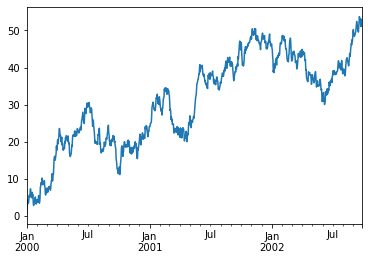

In [65]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

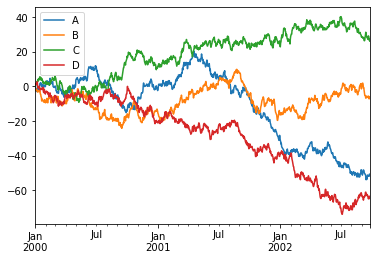

In [66]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')